Case 1: Maximum degree ≤ 2


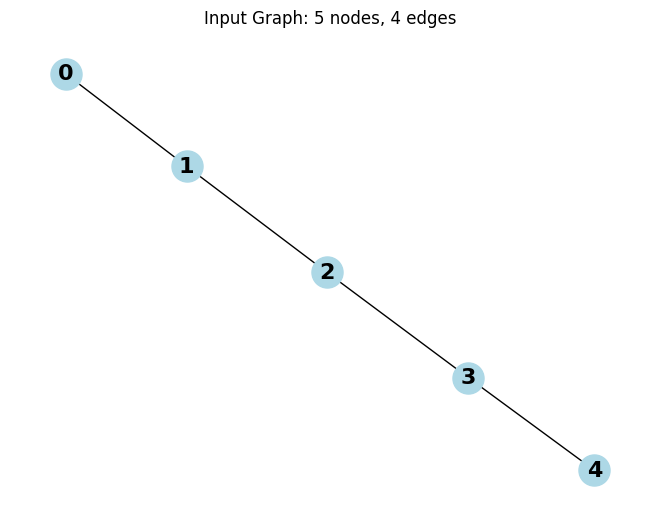

Case 1: Graph has maximum degree ≤ 2. MIS size: 2

Case 2: Vertex with degree 1


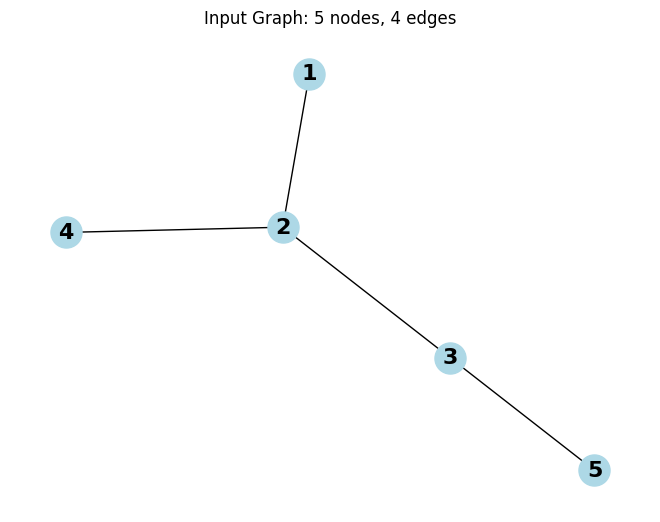

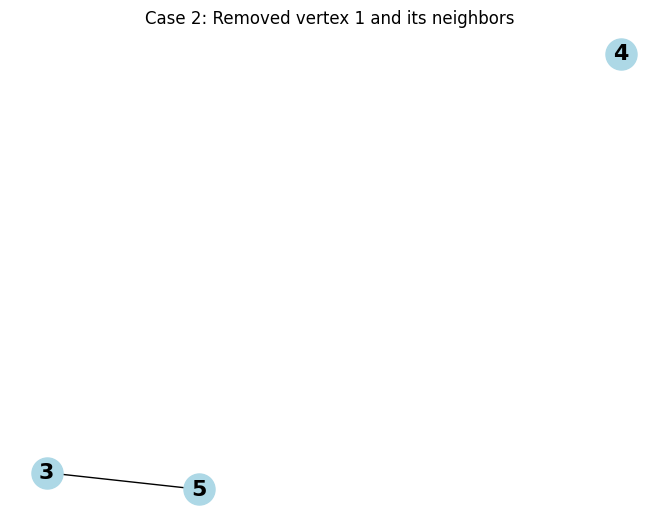

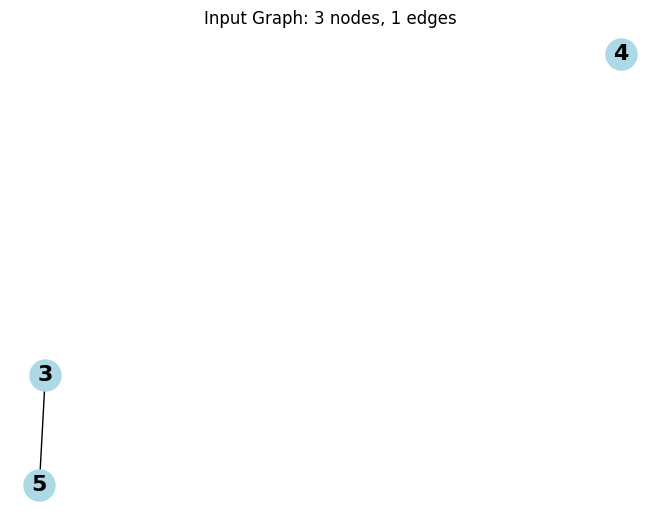

Case 1: Graph has maximum degree ≤ 2. MIS size: 2
Case 2: Vertex 1 has degree 1. MIS size: 3

Case 3: Graph is not connected


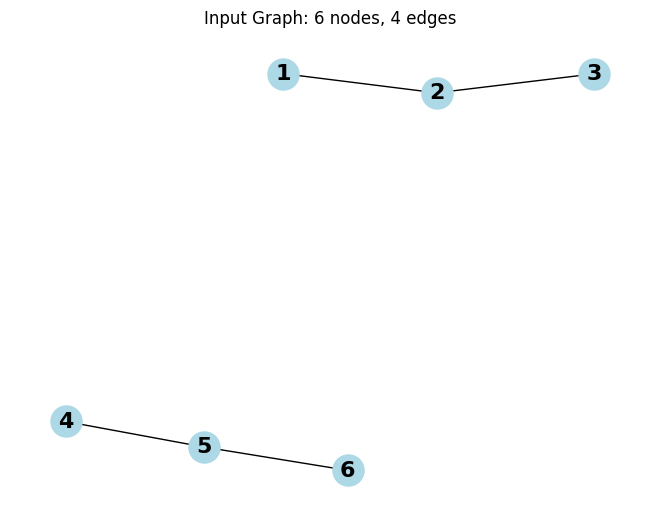

Case 1: Graph has maximum degree ≤ 2. MIS size: 3

Case 4: General case


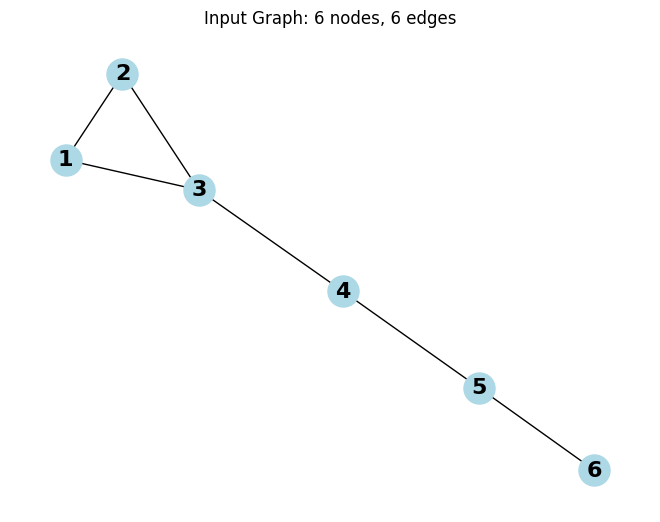

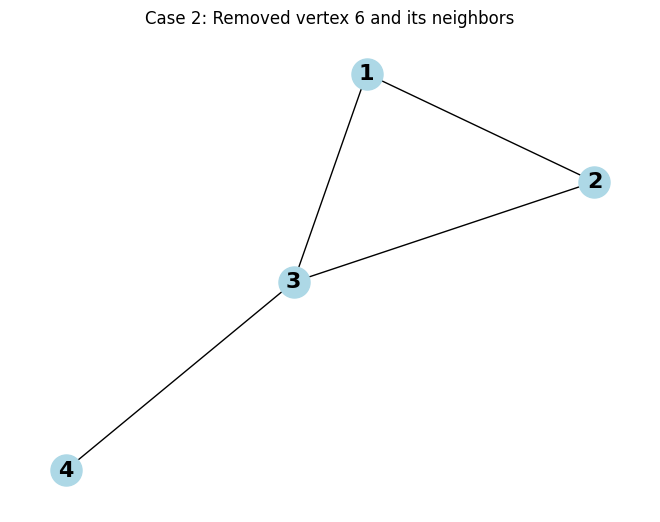

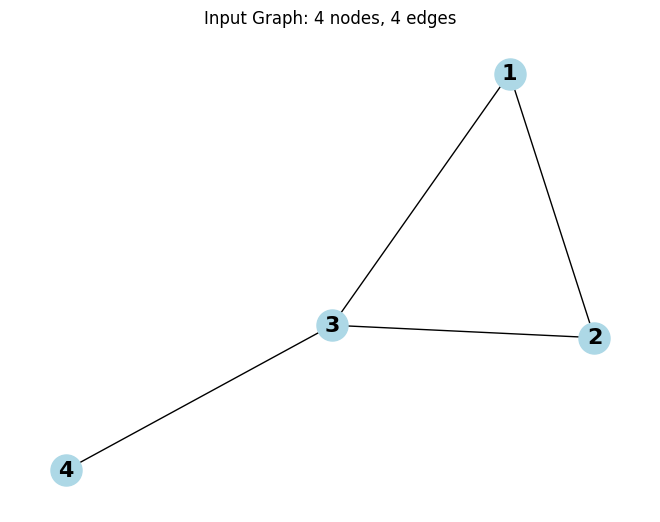

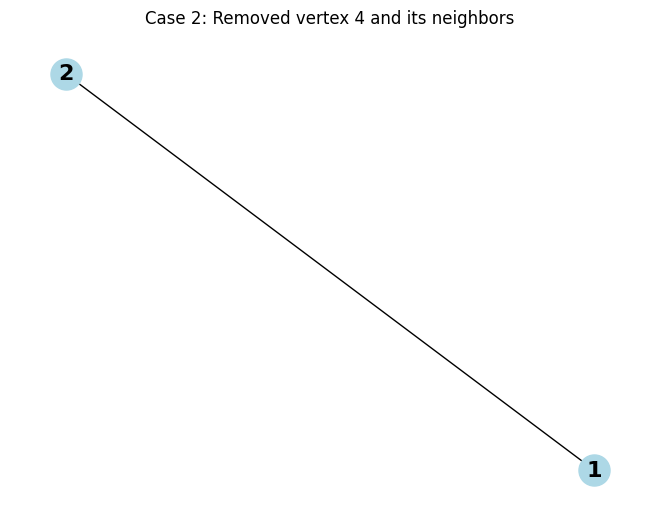

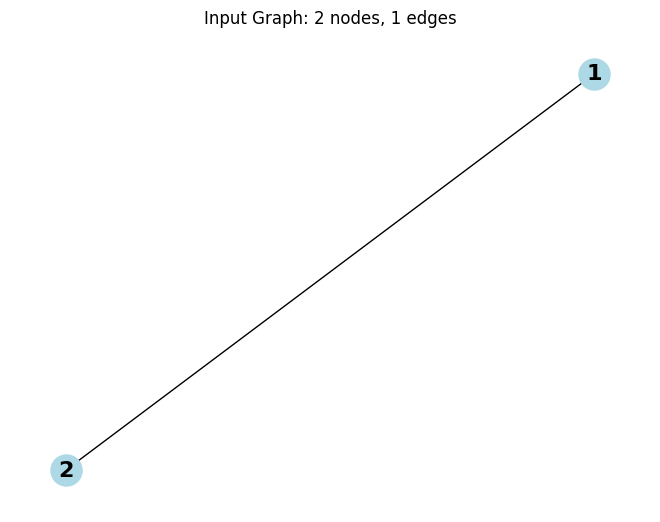

Case 1: Graph has maximum degree ≤ 2. MIS size: 1
Case 2: Vertex 4 has degree 1. MIS size: 2
Case 2: Vertex 6 has degree 1. MIS size: 3


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(G, title):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold')
    plt.title(title)
    plt.show()

def mis(G):
    visualize_graph(G, f"Input Graph: {len(G.nodes())} nodes, {len(G.edges())} edges")
    
    # Case 1: Maximum degree ≤ 2
    if max(dict(G.degree()).values(), default=0) <= 2:
        result = len(nx.maximal_independent_set(G))
        print(f"Case 1: Graph has maximum degree ≤ 2. MIS size: {result}")
        return result
    
    # Case 2: Vertex with degree 1 exists
    degree_1_nodes = [v for v, d in G.degree() if d == 1]
    if degree_1_nodes:
        v = degree_1_nodes[0]
        G_new = G.copy()
        G_new.remove_nodes_from([v] + list(G.neighbors(v)))
        visualize_graph(G_new, f"Case 2: Removed vertex {v} and its neighbors")
        result = 1 + mis(G_new)
        print(f"Case 2: Vertex {v} has degree 1. MIS size: {result}")
        return result
    
    # Case 3: Graph is not connected
    if not nx.is_connected(G):
        components = list(nx.connected_components(G))
        G1 = G.subgraph(components[0])
        G_rest = G.copy()
        G_rest.remove_nodes_from(components[0])
        visualize_graph(G1, "Case 3: First connected component")
        visualize_graph(G_rest, "Case 3: Rest of the graph")
        result = mis(G1) + mis(G_rest)
        print(f"Case 3: Graph is not connected. MIS size: {result}")
        return result
    
    # Case 4: General case
    v = max(G.degree(), key=lambda x: x[1])[0]
    G_with_v = G.copy()
    G_with_v.remove_nodes_from([v] + list(G.neighbors(v)))
    G_without_v = G.copy()
    G_without_v.remove_node(v)
    visualize_graph(G_with_v, f"Case 4: Graph with {v} and its neighbors removed")
    visualize_graph(G_without_v, f"Case 4: Graph with only {v} removed")
    result = max(1 + mis(G_with_v), mis(G_without_v))
    print(f"Case 4: General case. Chose vertex {v}. MIS size: {result}")
    return result

# Example usage for each case
print("Case 1: Maximum degree ≤ 2")
G1 = nx.path_graph(5)  # A path graph with 5 nodes
result1 = mis(G1)

print("\nCase 2: Vertex with degree 1")
G2 = nx.Graph()
G2.add_edges_from([(1,2), (2,3), (2,4), (3,5)])
result2 = mis(G2)

print("\nCase 3: Graph is not connected")
G3 = nx.Graph()
G3.add_edges_from([(1,2), (2,3), (4,5), (5,6)])
result3 = mis(G3)

print("\nCase 4: General case")
G4 = nx.Graph()
G4.add_edges_from([(1,2), (1,3), (2,3), (3,4), (4,5), (5,6)])
result4 = mis(G4)